<a href="https://colab.research.google.com/github/hana-magdy/Speech-emotion-recognition/blob/main/Speech_emotion_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Downloading the dataset and Imports




In [2]:
import os
os.chdir('/content')
!pip install --upgrade --force-reinstall --no-deps kaggle

Processing /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303/kaggle-1.5.12-cp37-none-any.whl
  Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [3]:

from google.colab import files
files.upload()

Saving kaggle.json to kaggle (5).json


{'kaggle.json': b'{"username":"hanamagdymohamed","key":"ac93c0007a5a74fe47ca9aa47b7044fa"}'}

In [4]:
 ! mkdir ~/.kaggle
 ! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [5]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [6]:
os.chdir('/content')
! kaggle datasets download dmitrybabko/speech-emotion-recognition-en

speech-emotion-recognition-en.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
 os.chdir('/content')
 ! mkdir ORL
 ! unzip speech-emotion-recognition-en.zip -d ORL

mkdir: cannot create directory ‘ORL’: File exists
Archive:  speech-emotion-recognition-en.zip
replace ORL/Crema/1001_DFA_ANG_XX.wav? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ORL/Crema/1001_DFA_ANG_XX.wav  
replace ORL/Crema/1001_DFA_DIS_XX.wav? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [7]:
os.chdir('/content/ORL/Crema')
directory = os.getcwd()
files=os.listdir(directory)

In [8]:
from scipy.io import wavfile
import numpy as np
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio





In [10]:
print(np.array(files).shape)

(7442,)


In [9]:
samplerate_List=[]
data_List=[]
Labels=[]


for i in range(0,7442):
  samplerate, data= wavfile.read('/content/ORL/Crema/'+str(files[i]))
  samplerate_List.append(samplerate)
  data_List.append(data)
  if "SAD" in str(files[i]) :
    Labels.append(0)
  elif "ANG" in str(files[i]) :
    Labels.append(1)
  elif "DIS" in str(files[i]) :
    Labels.append(2)
  elif "FEA" in str(files[i]):
    Labels.append(3)
  elif "HAP" in str(files[i]):
    Labels.append(4)
  elif "NEU" in str(files[i]):
    Labels.append(5)

       


In [10]:
def Waveplot(emotion,index):
  plt.figure(figsize=(10, 3))
  plt.title(f'Waveplot for audio with'+str(emotion)+'emotion', size=15)
  librosa.display.waveplot(np.float32(data_List[index]), sr=samplerate_List[index])
  plt.show()
 

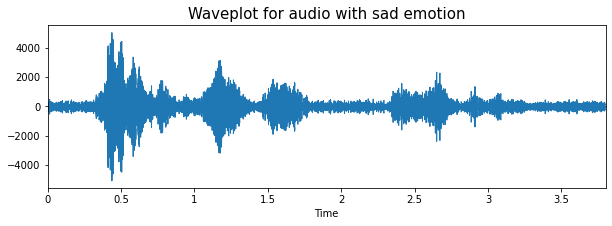

In [12]:
sad_index = Labels.index(0)
angry_index = Labels.index(1)
dis_index = Labels.index(2)
fea_index = Labels.index(3)
happy_index = Labels.index(4)
neu_index = Labels.index(5)

Waveplot(" sad ",sad_index)
Audio('/content/ORL/Crema/'+str(files[sad_index]))

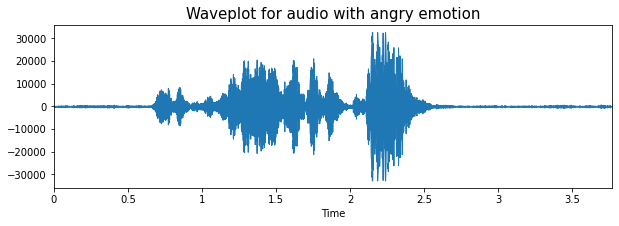

In [13]:
Waveplot(" angry ",angry_index)
Audio('/content/ORL/Crema/'+str(files[angry_index]))

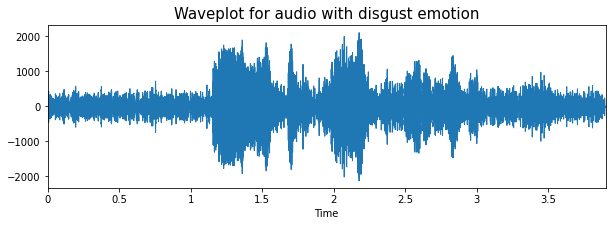

In [14]:
Waveplot(" disgust ",dis_index)
Audio('/content/ORL/Crema/'+str(files[dis_index]))

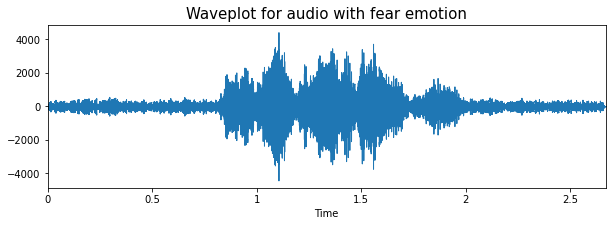

In [15]:
Waveplot(" fear ",fea_index)
Audio('/content/ORL/Crema/'+str(files[fea_index]))

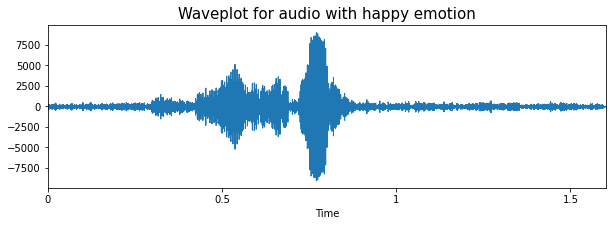

In [16]:
Waveplot(" happy ",happy_index)
Audio('/content/ORL/Crema/'+str(files[happy_index]))

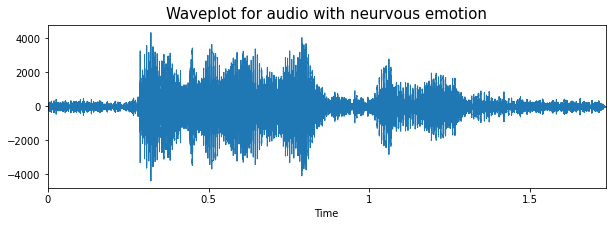

In [17]:
Waveplot(" neurvous ",neu_index)
Audio('/content/ORL/Crema/'+str(files[neu_index]))

In [19]:
print(np.array(Labels).shape)

(7442,)


In [20]:
print(Labels)

[4, 4, 5, 3, 4, 0, 4, 0, 2, 2, 0, 0, 5, 5, 1, 1, 3, 5, 4, 0, 5, 4, 4, 3, 5, 1, 4, 1, 5, 0, 1, 5, 0, 1, 3, 1, 0, 1, 0, 4, 2, 4, 4, 4, 4, 3, 4, 4, 3, 2, 0, 4, 3, 1, 5, 3, 0, 1, 4, 5, 3, 3, 3, 5, 3, 3, 3, 2, 1, 1, 2, 5, 3, 2, 0, 2, 2, 3, 2, 0, 3, 0, 3, 5, 0, 1, 1, 5, 0, 4, 4, 3, 1, 4, 0, 1, 3, 5, 3, 0, 3, 0, 1, 5, 4, 1, 0, 2, 4, 5, 3, 1, 0, 2, 3, 5, 2, 0, 1, 2, 0, 2, 0, 2, 2, 0, 4, 2, 5, 5, 0, 3, 0, 2, 1, 4, 1, 5, 4, 3, 4, 4, 5, 1, 3, 0, 0, 1, 3, 5, 4, 3, 5, 4, 3, 4, 0, 0, 3, 2, 3, 1, 4, 3, 2, 2, 1, 0, 5, 2, 2, 3, 5, 5, 4, 3, 3, 3, 1, 4, 1, 3, 1, 2, 5, 3, 1, 4, 0, 0, 4, 4, 5, 4, 1, 0, 5, 1, 4, 1, 4, 2, 4, 2, 1, 1, 1, 1, 0, 3, 2, 3, 1, 0, 2, 2, 3, 3, 2, 3, 1, 4, 4, 4, 3, 1, 0, 4, 1, 4, 2, 2, 0, 3, 4, 1, 0, 1, 4, 5, 3, 1, 4, 0, 2, 0, 5, 3, 3, 0, 2, 5, 4, 3, 3, 0, 3, 0, 4, 3, 1, 4, 3, 1, 2, 3, 0, 3, 5, 1, 0, 3, 5, 3, 2, 2, 2, 1, 2, 3, 1, 4, 3, 3, 3, 5, 3, 2, 3, 3, 2, 0, 4, 1, 2, 1, 1, 0, 0, 5, 5, 0, 2, 2, 3, 5, 3, 2, 4, 0, 2, 4, 4, 1, 4, 2, 4, 4, 0, 5, 3, 1, 2, 0, 0, 0, 1, 5, 4, 0, 3, 0, 4, 

In [21]:
print(Labels)

[4, 4, 5, 3, 4, 0, 4, 0, 2, 2, 0, 0, 5, 5, 1, 1, 3, 5, 4, 0, 5, 4, 4, 3, 5, 1, 4, 1, 5, 0, 1, 5, 0, 1, 3, 1, 0, 1, 0, 4, 2, 4, 4, 4, 4, 3, 4, 4, 3, 2, 0, 4, 3, 1, 5, 3, 0, 1, 4, 5, 3, 3, 3, 5, 3, 3, 3, 2, 1, 1, 2, 5, 3, 2, 0, 2, 2, 3, 2, 0, 3, 0, 3, 5, 0, 1, 1, 5, 0, 4, 4, 3, 1, 4, 0, 1, 3, 5, 3, 0, 3, 0, 1, 5, 4, 1, 0, 2, 4, 5, 3, 1, 0, 2, 3, 5, 2, 0, 1, 2, 0, 2, 0, 2, 2, 0, 4, 2, 5, 5, 0, 3, 0, 2, 1, 4, 1, 5, 4, 3, 4, 4, 5, 1, 3, 0, 0, 1, 3, 5, 4, 3, 5, 4, 3, 4, 0, 0, 3, 2, 3, 1, 4, 3, 2, 2, 1, 0, 5, 2, 2, 3, 5, 5, 4, 3, 3, 3, 1, 4, 1, 3, 1, 2, 5, 3, 1, 4, 0, 0, 4, 4, 5, 4, 1, 0, 5, 1, 4, 1, 4, 2, 4, 2, 1, 1, 1, 1, 0, 3, 2, 3, 1, 0, 2, 2, 3, 3, 2, 3, 1, 4, 4, 4, 3, 1, 0, 4, 1, 4, 2, 2, 0, 3, 4, 1, 0, 1, 4, 5, 3, 1, 4, 0, 2, 0, 5, 3, 3, 0, 2, 5, 4, 3, 3, 0, 3, 0, 4, 3, 1, 4, 3, 1, 2, 3, 0, 3, 5, 1, 0, 3, 5, 3, 2, 2, 2, 1, 2, 3, 1, 4, 3, 3, 3, 5, 3, 2, 3, 3, 2, 0, 4, 1, 2, 1, 1, 0, 0, 5, 5, 0, 2, 2, 3, 5, 3, 2, 4, 0, 2, 4, 4, 1, 4, 2, 4, 4, 0, 5, 3, 1, 2, 0, 0, 0, 1, 5, 4, 0, 3, 0, 4, 

In [11]:
ZCR_List=[]
Energy_List=[]
melSpec_List=[]
max_ZCR=0
max_Energy=0
max_YmelSpec=0
max_XmelSpec=0

for ind in range (0,7442):
  zcr=librosa.feature.zero_crossing_rate(y=np.float32(data_List[ind]))
  rmse = librosa.feature.rms(y=np.float32(data_List[ind]))
  X = librosa.stft(np.float32(data_List[ind]))
  Xdb = librosa.amplitude_to_db(abs(X))
  ZCR_List.append(zcr[0])
  Energy_List.append(rmse[0])
  melSpec_List.append(Xdb)

  yZcr=len(np.array(zcr[0]))
  yEn=len(np.array(rmse[0]))
  xmel=len(np.array(Xdb))
  ymel=len(np.array(Xdb[0]))
  if(max_ZCR<yZcr):
    max_ZCR=yZcr
  if(max_Energy<yEn):
    max_Energy=yEn
  if(max_YmelSpec<ymel):
    max_YmelSpec=ymel
  if(max_XmelSpec<xmel):
    max_XmelSpec=xmel




In [13]:
ZCR_List_Padded=[]
Energy_List_Padded=[]
Spect_Padded=[]


for i in range (0,7442):
  if len(ZCR_List[i])<max_ZCR:
    N =max_ZCR-len(ZCR_List[i])
    padding=np.zeros((1,N))
    ZCR_List_Padded.append(np.append(ZCR_List[i],padding))

  if len(Energy_List[i])<max_Energy:
    N =max_Energy-len(Energy_List[i])
    padding=np.zeros((1,N))
    Energy_List_Padded.append(np.append(Energy_List[i],padding))

  if len(melSpec_List[i][0])< max_YmelSpec:   
    N =max_YmelSpec-len(melSpec_List[i][0])
    melSpec_List[i].resize((max_XmelSpec,max_YmelSpec),refcheck=False)
    

In [14]:
print(len(melSpec_List[0][0]))
print(max_ZCR)
print(max_Energy)
print(max_YmelSpec)
print(max_XmelSpec)

157
157
157
157
1025


In [ ]:
print(np.array(ZCR_List).shape)
print(np.array(Energy_List).shape)
print(np.array(melSpec_List[0]).shape)

print(len(ZCR_List))
print(len(Energy_List))
print(len(melSpec_List))


In [17]:
Non_Testing=data_List[0:5209]
Non_Testing_Labels=Labels[0:5209]

Testing=data_List[5209:7442]
Testing_Labels=Labels[5209:7442]

Validation=Non_Testing[0:261]
Validation_Labels=Non_Testing_Labels[0:261]
Training=Non_Testing[261:5209]
Training_Labels=Non_Testing_Labels[261:5209]



print(np.array(Non_Testing_Labels).shape)

(5209,)


In [16]:
Non_Testing_ZCR=ZCR_List_Padded[0:5209]

Testing_ZCR=ZCR_List_Padded[5209:7442]
Validation_ZCR=Non_Testing_ZCR[0:261]
Training_ZCR=Non_Testing_ZCR[261:5209]

Non_Testing_Energy=Energy_List_Padded[0:5209]
Testing_Energy=Energy_List_Padded[5209:7442]
Validation_Energy=Non_Testing_Energy[0:261]
Training_Energy=Non_Testing_Energy[261:5209]

Non_Testing_Spec=melSpec_List[0:5209]
Testing_Spec=melSpec_List[5209:7442]
Validation_Spec=Non_Testing_Spec[0:261]
Training_Spec=Non_Testing_Spec[261:5209]
